In [8]:
import re

import pandas as pd
from pathlib import Path
from ploting import *

In [9]:
root_path = "."

In [10]:
time_re = re.compile("apply - inverse mass -.*\|\s+(\d+)\s+\|\s+(\d+(\.\d+)?)")

In [11]:
iter_re = re.compile("DEAL:.*::iterations:\s*(\d+)")

In [12]:
def config_data(filename: str):
    items = filename.replace(".out", "").split("-")
    return dict((key, value) for key, value in [item.split("_", maxsplit=1) for item in items])

In [18]:
data = []
for file in Path(f"{root_path}/data").iterdir():
    with open(file, "r") as input:
        if t_m := time_re.search(input.read()):
            data.append({**config_data(file.name),
                         "time": t_m.group(2), "timesteps": t_m.group(1)})
df = pd.DataFrame(data).astype({"dim": int, "ncells": int, "order": int, "timesteps": int, "time": float}).drop(columns=["cpu", "dryrun", "fmt", "order", "refinements", "dim", "batchsize", "exec", "gpu"])
df

,ncells,solver,testcase,time,timesteps
0,25600,matrix_based,1,5.1740,140
1,100,batched_gko,1,1.1540,2635
2,25600,batched_gko,1,7.3420,140
3,100,matrix_based,1,3.3280,2635
4,400,batched_gko,1,1.1440,1250
5,1024,batched_gko,0,0.8295,570
6,400,matrix_based,1,2.1680,1250
7,1024,matrix_based,0,0.6256,570
8,4096,batched_gko,0,1.4650,285
9,16,batched_gko,0,0.5769,3395


In [20]:
df['time_normalized'] = df.time / df.timesteps / df.ncells
df

,ncells,solver,testcase,time,timesteps,time_normalized
0,25600,matrix_based,1,5.1740,140,1.443638e-06
1,100,batched_gko,1,1.1540,2635,4.379507e-06
2,25600,batched_gko,1,7.3420,140,2.048549e-06
3,100,matrix_based,1,3.3280,2635,1.262998e-05
4,400,batched_gko,1,1.1440,1250,2.288000e-06
5,1024,batched_gko,0,0.8295,570,1.421155e-06
6,400,matrix_based,1,2.1680,1250,4.336000e-06
7,1024,matrix_based,0,0.6256,570,1.071820e-06
8,4096,batched_gko,0,1.4650,285,1.254968e-06
9,16,batched_gko,0,0.5769,3395,1.062040e-05


In [33]:
df0 = df[df.testcase == "0"]
df1 = df[df.testcase == "1"]

<Axes: xlabel='ncells'>

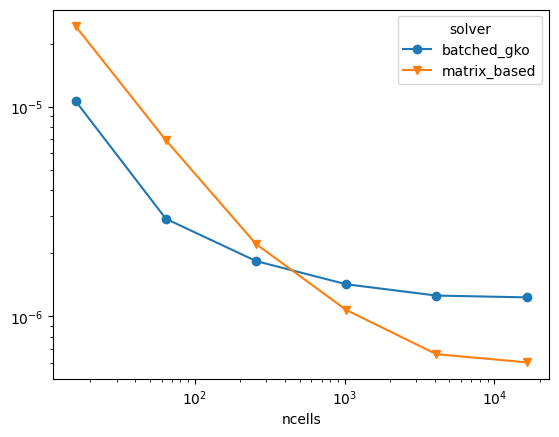

In [44]:
df0.set_index(["ncells", "solver"]).time_normalized.unstack().plot(logx=True, logy=True)

<Axes: xlabel='ncells'>

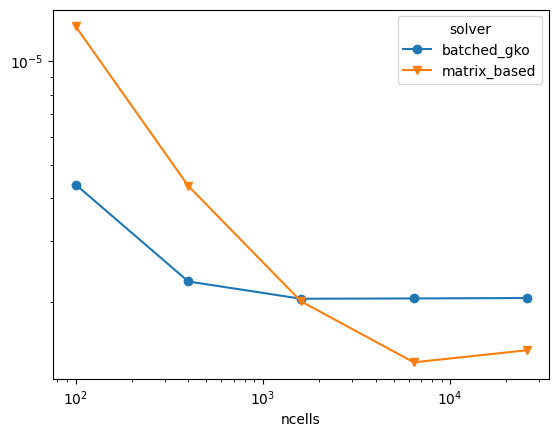

In [45]:
df1.set_index(["ncells", "solver"]).time_normalized.unstack().plot(logx=True, logy=True)